# Multiple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# https://satishgunjal.com/multivariate_lr/

    
def feature_normalize(X):
    """
    Normalizes the features(input variables) in X.

    Parameters
    ----------
    X : n dimensional array (matrix), shape (n_samples, n_features)
        Features(input varibale) to be normalized.

    Returns
    -------
    X_norm : n dimensional array (matrix), shape (n_samples, n_features)
        A normalized version of X.
    mu : n dimensional array (matrix), shape (n_features,)
        The mean value.
    sigma : n dimensional array (matrix), shape (n_features,)
        The standard deviation.
    """
    #Note here we need mean of indivdual column here, hence axis = 0
    mu = np.mean(X, axis = 0)  
    # Notice the parameter ddof (Delta Degrees of Freedom)  value is 1
    sigma = np.std(X, axis= 0, ddof = 1)  # Standard deviation (can also use range)
    X_norm = (X - mu)/sigma
    return X_norm, mu, sigma



def compute_cost(X, y, theta):
    """
    Compute Mean Squared Error (MSE).

    Input Parameters
    ----------------
    X: 2D feature ndarray. Dimension(m x n)
    y: 1D array. dimension(1 x m)
    theta : 1D array of fitting parameters or weights. Dimension (1 x n)

    Output Parameters
    -----------------
    result : Scalar value.
    """
    predictions = X @ theta # @ = element wise dot production, same as 'X.dot(theta)'
    errors = predictions -  y
    sqrErrors = errors ** 2
    result = sum(sqrErrors) / len(y)
    return result

def gradient_descent(X, y, theta, alpha, iterations):
    """
    Apply derivative function on cost function, so that errors reduce.

    Input Parameters
    ----------------
    X: 2D feature ndarray. Dimension(m x n)
    y: 1D array. dimension(m x 1)
    theta : 1D array of fitting parameters or weights. Dimension (1 x n)
    alpha : Learning rate. Scalar value
    iterations: Number of iterations. Scalar value. 

    Output Parameters
    -----------------
    theta : Final Value. 1D array of fitting parameters or weights. Dimension (1 x n)
    cost_history: Conatins value of cost for each iteration. 1D array. Dimansion(m x 1)
    """
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X @ theta
        errors = predictions - y
        sum_delta = (alpha / len(y)) * (X.T @ errors)
        theta = theta - sum_delta;

        cost_history[i] = compute_cost(X, y, theta)  

    return theta, cost_history

df = pd.read_csv('https://raw.githubusercontent.com/satishgunjal/datasets/master/multivariate_housing_prices_in_portlans_oregon.csv')
print(df.head())

X = df.values[:, 0:2]  # get input values from first two columns
y = df.values[:, 2]  # get output values from last coulmn
m = len(y) # Number of training examples

print('Total no of training examples (m) = %s \n' %(m))

# Show only first 5 records
for i in range(5):
    print('x =', X[i, ], ', y =', y[i])

X, mu, sigma = feature_normalize(X)

print('mu= ', mu)
print('sigma= ', sigma)
print('X_norm= ', X[:5])
# Lets use hstack() function from numpy to add column of ones to X feature 
X = np.hstack((np.ones((m,1)), X))


# We need theta parameter for every input variable. since we have three input variable including X_0 (column of ones)
theta = np.zeros(X.shape[1])
iterations = 400
alpha = 0.15
theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('First 5 values from cost_history =', cost_history[:5])
print('Last 5 values from cost_history =', cost_history[-5 :])

# make a prediction
normalize_test_data = ((np.array([1650, 3]) - mu) / sigma)
normalize_test_data = np.hstack((np.ones(1), normalize_test_data))
price = normalize_test_data.dot(theta)
print('Predicted price of a 1650 sq-ft, 3 br house:', price)

   size(in square feet)   number of bedrooms   price
0                  2104                    3  399900
1                  1600                    3  329900
2                  2400                    3  369000
3                  1416                    2  232000
4                  3000                    4  539900
Total no of training examples (m) = 47 

x = [2104    3] , y = 399900
x = [1600    3] , y = 329900
x = [2400    3] , y = 369000
x = [1416    2] , y = 232000
x = [3000    4] , y = 539900
mu=  [2000.68085106    3.17021277]
sigma=  [7.94702354e+02 7.60981887e-01]
X_norm=  [[ 0.13000987 -0.22367519]
 [-0.50418984 -0.22367519]
 [ 0.50247636 -0.22367519]
 [-0.73572306 -1.53776691]
 [ 1.25747602  1.09041654]]
Final value of theta = [340412.65957447 110631.0502787   -6649.47427067]
First 5 values from cost_history = [9.53082175e+10 6.97609358e+10 5.15084953e+10 3.84293816e+10
 2.90319543e+10]
Last 5 values from cost_history = [4.0865601e+09 4.0865601e+09 4.0865601e+09 4.0865601e+09

Text(0.5, 1.0, 'Convergence of gradient descent')

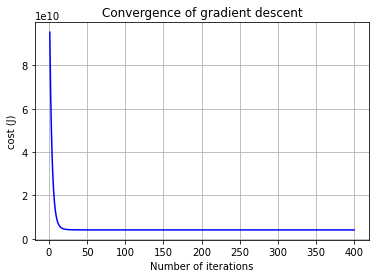

In [2]:
import matplotlib.pyplot as plt
plt.plot(range(1, iterations +1), cost_history, color ='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Convergence of gradient descent")

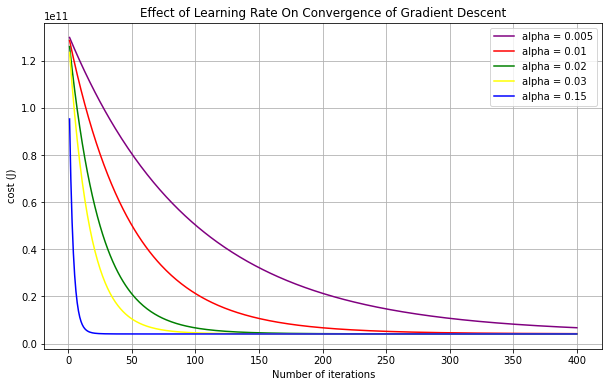

In [3]:
iterations = 400;
theta = np.zeros(X.shape[1])

alpha = 0.005;
theta_1, cost_history_1 = gradient_descent(X, y, theta, alpha, iterations)

alpha = 0.01;
theta_2, cost_history_2 = gradient_descent(X, y, theta, alpha, iterations)

alpha = 0.02;
theta_3, cost_history_3 = gradient_descent(X, y, theta, alpha, iterations)

alpha = 0.03;
theta_4, cost_history_4 = gradient_descent(X, y, theta, alpha, iterations)

alpha = 0.15;
theta_5, cost_history_5 = gradient_descent(X, y, theta, alpha, iterations)

plt.plot(range(1, iterations +1), cost_history_1, color ='purple', label = 'alpha = 0.005')
plt.plot(range(1, iterations +1), cost_history_2, color ='red', label = 'alpha = 0.01')
plt.plot(range(1, iterations +1), cost_history_3, color ='green', label = 'alpha = 0.02')
plt.plot(range(1, iterations +1), cost_history_4, color ='yellow', label = 'alpha = 0.03')
plt.plot(range(1, iterations +1), cost_history_5, color ='blue', label = 'alpha = 0.15')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Effect of Learning Rate On Convergence of Gradient Descent")
plt.legend()

Text(0.5, 1.0, 'Effect of Large Learning Rate On Convergence of Gradient Descent')

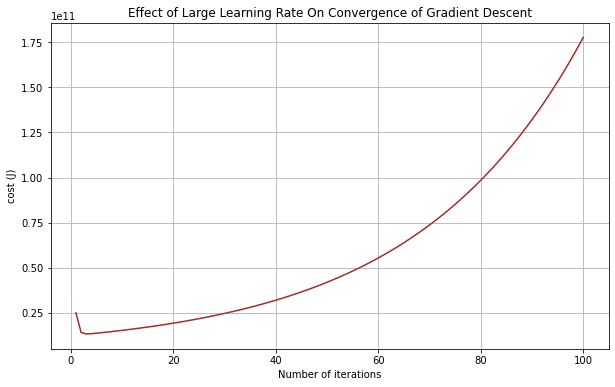

In [4]:
iterations = 100;
theta = np.zeros(X.shape[1])

alpha = 1.32;
theta_6, cost_history_6 = gradient_descent(X, y, theta, alpha, iterations)

plt.plot(range(1, iterations +1), cost_history_6, color ='brown')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Effect of Large Learning Rate On Convergence of Gradient Descent")
